<a href="https://colab.research.google.com/github/santoshdhalwalkar/Calculator/blob/main/edaforrealestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [634]:
#import drive from google
from google.colab import drive

In [635]:
# mount the drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [636]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [637]:
# read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/housing_data.csv")
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [638]:
#drop the unwanted column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave   NaN      Reg   
1          SC20       RL           80     9600   Pave   NaN      Reg   
2          SC60       RL           68    11250   Pave   NaN      IR1   
3          SC70       RL           60     9550   Pave   NaN      IR1   
4          SC60       RL           84    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave   NaN      Reg   
1456       SC20       RL           85    13175   Pave   NaN      Reg   
1457       SC70       RL           66     9042   Pave   NaN      Reg   
1458       SC20       RL           68     9717   Pave   NaN      Reg   
1459       SC20       RL           75     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0     No     No          No   
1456         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1457         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0     No     No          No   
1459         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb    2008        WD         Normal     208500  
1          0    May    2007        WD         Normal     181500  
2          0    Sep    2008        WD         Normal     223500  
3          0    Feb    2006        WD        Abnorml     140000  
4          0    Dec    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0    Aug    2007        WD         Normal     175000  
1456       0    Feb    2010        WD         Normal     210000  
1457    2500    May    2010        WD         Normal     266500  
1458       0    Apr    2010        WD         Normal     142125  
1459       0    Jun    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [639]:
df.shape

(1460, 80)

In [640]:
# summary statistics

df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

In [641]:
# what is the info in my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [642]:
# finding null values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [643]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 0 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'Alley': 1369 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrType': 872 null values
Column 'MasVnrArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null valu

In [644]:
# Renaming columns
df = df.rename(columns={
    'MSSubClass': 'PropertySubClass',
    'MSZoning': 'PropertyZone',
     'LotFrontage': 'PropertyFrontage',
    'LotArea': 'PropertyArea',
    'LotShape': 'PropertyShape',
    'LandContour': 'PropertyContour',
    'LotConfig': 'PropertyConfig',
    'LandSlope': 'PropertySlope',
    'MasVnrType': 'MasonryVeneerType',
    'MasVnrArea':'MasonryVeneerArea',
    'BsmtQual':'BasementQuality',
    'BsmtCond': 'BasementCondition',
    'BsmtExposure': 'BasementExposure',
    'BsmtFinType1':'BasementFinishType1',
    'BsmtFinType2':'BasementFinishType2',
    'BsmtFinSF1':'BasementFinishSquareFeet1',
    'BsmtFinSF2':'BasementFinishSquareFeet2',
    'BsmtUnfSF': 'BasementUnFinishSquareFeet',
    'TotalBsmtSF': 'TotalBasementSquareFeet',
    'GrLivArea': 'AboveGradeGroundLiving Area',
    'BsmtFullBath':'BasementFullBath',
    'BsmtHalfBath':'BasementHalfBath',
    'TotRmsAbvGrd': 'TotalRoomsAboveGrade',
    '1stFlrSF': 'FirstFloorSquareFeet',
    '2ndFlrSF':'SecondFloorSquareFeet',
    '3SsnPorch': 'ThreeSeasonPorchArea'

})

In [645]:
df.columns

Index(['PropertySubClass', 'PropertyZone', 'PropertyFrontage', 'PropertyArea',
       'Street', 'Alley', 'PropertyShape', 'PropertyContour', 'Utilities',
       'PropertyConfig', 'PropertySlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasonryVeneerType', 'MasonryVeneerArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BasementQuality', 'BasementCondition',
       'BasementExposure', 'BasementFinishType1', 'BasementFinishSquareFeet1',
       'BasementFinishType2', 'BasementFinishSquareFeet2',
       'BasementUnFinishSquareFeet', 'TotalBasementSquareFeet', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFloorSquareFeet',
       'SecondFloorSquareFeet', 'LowQualFinSF', 'AboveGradeGroundLiving Area',
       'BasementFullBath', 'BasementHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvG

In [646]:
# find unique values in label
df['PropertySubClass'].unique()

array(['SC60', 'SC20', 'SC70', 'SC50', 'SC190', 'SC45', 'SC90', 'SC120',
       'SC30', 'SC85', 'SC80', 'SC160', 'SC75', 'SC180', 'SC40'],
      dtype=object)

In [647]:
df['PropertySubClass'] = df['PropertySubClass'].replace({'SC60': '2-STORY 1946 & NEWER', 'SC20': '1-STORY 1946 & NEWER ALL STYLES', 'SC70': '2-STORY 1945 & OLDER','SC50': '1-1/2 STORY FINISHED ALL AGES','SC190': '2 FAMILY CONVERSION - ALL STYLES AND AGES', 'SC45': '1-1/2 STORY - UNFINISHED ALL AGES', 'SC90': 'DUPLEX - ALL STYLES AND AGES','SC120': '1-STORY PUD 1946 & NEWER', 'SC30': '1-STORY 1945 & OLDER', 'SC80': 'SPLIT OR MULTI-LEVEL', 'SC85': 'SPLIT FOYER', 'SC160': '2-STORY PUD - 1946 & NEWER', 'SC75': '2-1/2 STORY ALL AGES', 'SC180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                                   'SC40': '1-STORY W/FINISHED ATTIC ALL AGES'})
df['PropertySubClass'].value_counts()

PropertySubClass
1-STORY 1946 & NEWER ALL STYLES              536
2-STORY 1946 & NEWER                         299
1-1/2 STORY FINISHED ALL AGES                144
1-STORY PUD 1946 & NEWER                      87
1-STORY 1945 & OLDER                          69
2-STORY PUD - 1946 & NEWER                    63
2-STORY 1945 & OLDER                          60
SPLIT OR MULTI-LEVEL                          58
DUPLEX - ALL STYLES AND AGES                  52
2 FAMILY CONVERSION - ALL STYLES AND AGES     30
SPLIT FOYER                                   20
2-1/2 STORY ALL AGES                          16
1-1/2 STORY - UNFINISHED ALL AGES             12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER       10
1-STORY W/FINISHED ATTIC ALL AGES              4
Name: count, dtype: int64

In [648]:
df['PropertyZone'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [649]:
df['PropertyZone'] = df['PropertyZone'].replace({'RL': 'Residential Low-Density', 'RM': 'Residential Medium Density', 'C': 'Commercial', 'FV': 'Floating Village Residential','RH': 'Residential High-Density'})

In [650]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [651]:
# find unique values in label
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [652]:
# drop the column because have same data
df.drop(['Alley'], axis=1, inplace=True)


In [653]:
df.shape

(1460, 79)

In [654]:
# to understand better we replace the names of data

df['Street'] = df['Street'].replace({'Pave': 'Paved ', 'Grvl': 'Gravel'})

In [655]:
df['Street'].value_counts()

Street
Paved     1454
Gravel       6
Name: count, dtype: int64

In [656]:
# find unique values in label
df['PropertyShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

<Axes: xlabel='PropertyShape'>

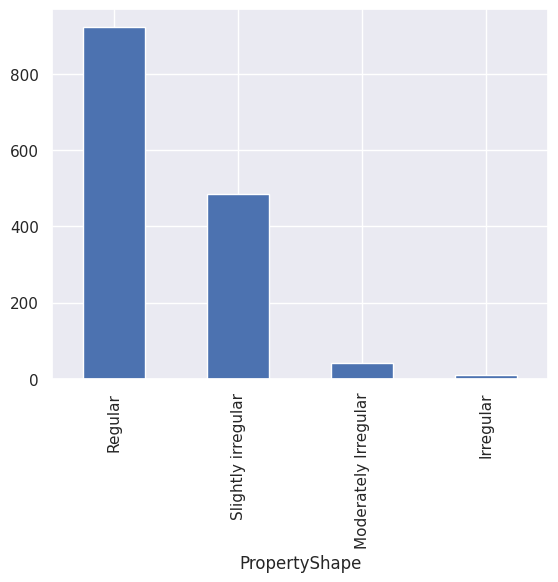

In [657]:
df['PropertyShape'] = df['PropertyShape'].replace({'IR1': 'Slightly irregular', 'Reg': 'Regular', 'IR2': 'Moderately Irregular', 'IR3': 'Irregular'})

df['PropertyShape'].value_counts().plot(kind='bar')

In [658]:
df['PropertyContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

<Axes: xlabel='PropertyContour'>

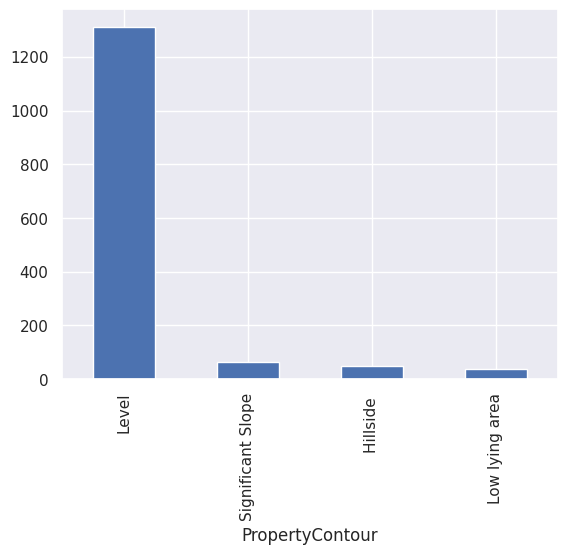

In [659]:
df['PropertyContour'] = df['PropertyContour'].replace({'Lvl': 'Level', 'Bnk': 'Significant Slope', 'Low': 'Low lying area', 'HLS': 'Hillside '})

df['PropertyContour'].value_counts().plot(kind='bar')

In [660]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [661]:
# to understand better we replace the names of data

df['Utilities'] = df['Utilities'].replace({'AllPub': 'All public Utilities ', 'NoSeWa': 'Electricity and Gas Only'})

In [662]:
df['PropertySlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [663]:
# to understand better we replace the names of data

df['PropertySlope'] = df['PropertySlope'].replace({'Gtl': 'Gentle slope ', 'Mod': 'Moderate slope ', 'Sev': 'Severe slope '})

In [664]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [665]:
# to understand better we replace the names of data

df['Neighborhood'] = df['Neighborhood'].replace({'Blmngtn ': 'Bloomington Heights', 'Blueste ': 'Bluestem', 'BrDale': 'Briardale', 'BrkSide': 'Brookside', 'ClearCr': 'Clear Creek', 'CollgCr': 'College Creek',
                                          'Crawfor ': 'Crawford', 'Edwards': 'Edwards', 'Gilbert': 'Gilbert', 'IDOTRR': 'Iowa DOT and Rail Road', 'MeadowV ': 'Meadow Village', 'Mitchel' : 'Mitchell',
                                          'Names': 'North Ames', 'NoRidge': 'Northridge', 'NPkVill': 'Northpark Villa', 'NridgHt': 'Northridge Heights', 'NWAmes': 'Northwest Ames', 'OldTown' : 'Old Town',
                                          'SWISU ': 'South & West of Iowa State University', 'Sawyer ': 'Sawyer', 'SawyerW ': 'Sawyer West', 'Somerst ': 'Somerset', 'StoneBr': 'Stone Brook', 'Timber' : 'Timberland',
                                          'Veenker ' : 'Veenker'})

In [666]:
df['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [667]:
df['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [668]:
# drop the column because have same data
df.drop(['Condition1'], axis=1, inplace=True)

In [669]:
# to understand better we replace the names of data

df['Condition2'] = df['Condition2'].replace({'Artery ': 'Adjacent to arterial street', 'Norm': 'Normal', 'RRNn ': 'Within 200 of North-South Railroad',  'Feedr': 'Adjacent to feeder street', 'PosN ': 'Near positive off-site feature park greenbelt etc', 'RRAn': 'Adjacent to North-South Railroad', 'RRAe': 'Adjacent to East-West Railroad', 'PosA': 'Adjacent to positive off-site feature '})

In [670]:
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [671]:
df['BldgType'] = df['BldgType'].replace({'1Fam': 'Single-family Detached ', '2fmCon': 'Two-family Conversion originally built as one-family dwelling', 'Duplex': 'Duplex', 'TwnhsE': 'Townhouse End Unit', 'Twnhs': 'Townhouse Inside Unit'})

In [672]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [673]:
df['HouseStyle'] = df['HouseStyle'].replace({'2Story': 'Two-story ', '1Story': '1Story One story', '1.5Fin': 'One and one-half story 2nd level finished', '1.5Unf': 'One and one-half story 2nd level unfinished', 'SFoyer': 'Split Foyer', 'SLvl': 'Split Level', '2.5Unf': 'Two and one-half story 2nd level unfinished',
'2.5Fin': 'Two and one-half story 2nd level finished'})

In [674]:
df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [675]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [676]:
# drop the column because have same data
df.drop(['OverallCond'], axis=1, inplace=True)

In [677]:
df['OverallQual'] = df['OverallQual'].replace({'1': 'Very Poor', '2': 'Poor ', '3': 'Fair','4': 'Below Average', '5': 'Average ', '6': 'Above Average','7': 'Good','8': 'Very Good', '9': 'Excellent ', '10': 'Very Excellent'})

In [678]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [679]:
df['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [680]:
df['RoofMatl'] = df['RoofMatl'].replace({'ClyTile ': 'Clay or Tile', 'CompShg ': 'Standard (Composite) Shingle  ', 'Membran ': 'Membrane','Metal ': 'Metal Average', 'Roll ': 'Roll  ', 'Tar&Grv': 'Gravel & Tar','WdShake ': 'Wood Shakes','WdShngl ': 'Wood Shingles'})

In [681]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [682]:
df['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [683]:
# drop the column because have same data
df.drop(['Exterior2nd'], axis=1, inplace=True)

In [684]:
df.columns

Index(['PropertySubClass', 'PropertyZone', 'PropertyFrontage', 'PropertyArea',
       'Street', 'PropertyShape', 'PropertyContour', 'Utilities',
       'PropertyConfig', 'PropertySlope', 'Neighborhood', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasonryVeneerType',
       'MasonryVeneerArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BasementQuality', 'BasementCondition', 'BasementExposure',
       'BasementFinishType1', 'BasementFinishSquareFeet1',
       'BasementFinishType2', 'BasementFinishSquareFeet2',
       'BasementUnFinishSquareFeet', 'TotalBasementSquareFeet', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFloorSquareFeet',
       'SecondFloorSquareFeet', 'LowQualFinSF', 'AboveGradeGroundLiving Area',
       'BasementFullBath', 'BasementHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotalRoomsAboveGrade',
       'Fu

In [685]:
df['MasonryVeneerType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [686]:
df['MasonryVeneerType'] = df['MasonryVeneerType'].replace({'BrkFace ': 'Brick Veneer', 'Stone ': 'Stone Veneer', 'BrkCmn ': 'Common Brick'})

In [687]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [688]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [689]:
df['ExterQual'] = df['ExterQual'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [690]:
df['ExterCond'] = df['ExterCond'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [691]:
df['BasementQuality'].unique()

array(['Gd', 'TA', 'Ex', 'No', 'Fa'], dtype=object)

In [692]:
df['BasementQuality'] = df['BasementQuality'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [693]:
df['BasementCondition'].unique()

array(['TA', 'Gd', 'No', 'Fa', 'Po'], dtype=object)

In [694]:
df['BasementCondition'] = df['BasementCondition'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor','No': 'No'})

In [695]:
df['BasementExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [696]:
df['BasementExposure'] = df['BasementExposure'].replace({'Gd': 'Good Exposure', 'Av': 'Average Exposure ', 'Mn': 'Mimimum Exposure','No ': 'No Exposure'})

In [697]:
df['BasementFinishType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No', 'LwQ'], dtype=object)

In [698]:
# to understand better we replace the names of data

df['BasementFinishType1'] = df['BasementFinishType1'].replace({'GLQ': 'Good Living Quarters', 'ALQ': 'Average Living Quarters', 'Unf': 'Unfinished', 'Rec': 'Average Rec Room','BLQ': ' Below Average Living Quarters', 'nan': 'No Basement','LwQ': 'Low Quality'})

In [699]:
# drop the column because have same data
df.drop(['BasementFinishType2'], axis=1, inplace=True)

In [700]:
# drop the column because have same data
df.drop(['BasementFinishSquareFeet2'], axis=1, inplace=True)

In [701]:
df['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [702]:
df['HeatingQC'] = df['HeatingQC'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [703]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [704]:
df['Electrical'] = df['Electrical'].replace({'SBrkr ': 'Standard Circuit Breakers & Romex', 'FuseF': 'FuseF', '60 AMP Fuse Box and mostly Romex wiring': 'FuseP','60 AMP Fuse Box and mostly knob & tube wiring': 'Fair','Mix': 'Mixed'})

In [705]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'No', 'Ex', 'Po'], dtype=object)

In [706]:
df['GarageQual'] = df['GarageQual'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor','No': 'No'})

In [707]:
df['GarageCond'].unique()

array(['TA', 'Fa', 'No', 'Gd', 'Po', 'Ex'], dtype=object)

In [708]:
df['GarageQual'] = df['GarageQual'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor','No': 'No'})

In [709]:
df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [710]:
df['SaleCondition'] = df['SaleCondition'].replace({'Normal': 'Normal', ' Abnorml': ' Abnorml', 'AdjLand': 'Adjoining Land Purchase', 'Alloca ': 'Allocation ', 'Family ': 'Sale between family members', 'Partial': 'Home was not completed '})

In [711]:
# finding null values
df.isnull().sum()

PropertySubClass    0
PropertyZone        0
PropertyFrontage    0
PropertyArea        0
Street              0
                   ..
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 74, dtype: int64

In [712]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'PropertySubClass': 0 null values
Column 'PropertyZone': 0 null values
Column 'PropertyFrontage': 0 null values
Column 'PropertyArea': 0 null values
Column 'Street': 0 null values
Column 'PropertyShape': 0 null values
Column 'PropertyContour': 0 null values
Column 'Utilities': 0 null values
Column 'PropertyConfig': 0 null values
Column 'PropertySlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'MasonryVeneerType': 872 null values
Column 'MasonryVeneerArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Column 'BasementQuality': 0 null values
Column 'BasementCondition': 0 null values
Col

In [713]:
df['MasonryVeneerType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [714]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mixed', nan], dtype=object)

In [715]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [716]:
# Find the mode for categorical data
mode=df['Electrical'].mode()[0]  # to find the means of the column
mode

'SBrkr'

In [717]:
#fill the null values with mode
df['Electrical'].fillna(value=mode, inplace=True)


In [718]:
# Find the mean Values
mean=df['GarageYrBlt'].mean()  # to find the means of the column
mean



1978.5061638868744

In [719]:
# Find the nmedian values
md=df['GarageYrBlt'].median()  # to find the median of the column
md

1980.0

In [720]:
# replace the with the median values

df['GarageYrBlt'].fillna(value=md, inplace=True)

In [721]:
# Find the mode for categorical data
mode=df['MasonryVeneerType'].mode()[0]  # to find the means of the column
mode

'BrkFace'

In [722]:
#fill the null values with mode
df['MasonryVeneerType'].fillna(value=mode, inplace=True)

In [723]:
# what is the info in my data after replacing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PropertySubClass             1460 non-null   object 
 1   PropertyZone                 1460 non-null   object 
 2   PropertyFrontage             1460 non-null   int64  
 3   PropertyArea                 1460 non-null   int64  
 4   Street                       1460 non-null   object 
 5   PropertyShape                1460 non-null   object 
 6   PropertyContour              1460 non-null   object 
 7   Utilities                    1460 non-null   object 
 8   PropertyConfig               1460 non-null   object 
 9   PropertySlope                1460 non-null   object 
 10  Neighborhood                 1460 non-null   object 
 11  Condition2                   1460 non-null   object 
 12  BldgType                     1460 non-null   object 
 13  HouseStyle        

In [724]:
# Transpose  the data have a different look at the data
df.head().T

0                                1  \
PropertySubClass     2-STORY 1946 & NEWER  1-STORY 1946 & NEWER ALL STYLES   
PropertyZone      Residential Low-Density          Residential Low-Density   
PropertyFrontage                       65                               80   
PropertyArea                         8450                             9600   
Street                             Paved                            Paved    
...                                   ...                              ...   
MoSold                                Feb                              May   
YrSold                               2008                             2007   
SaleType                               WD                               WD   
SaleCondition                      Normal                           Normal   
SalePrice                          208500                           181500   

                                        2                        3  \
PropertySubClass     2-STORY 1946 & NEWER     2-STORY 1945 & OLDER   
PropertyZone      Residential Low-Density  Residential Low-Density   
PropertyFrontage                       68                       60   
PropertyArea                        11250                     9550   
Street                             Paved                    Paved    
...                                   ...                      ...   
MoSold                                Sep                      Feb   
YrSold                               2008                     2006   
SaleType                               WD                       WD   
SaleCondition                      Normal                  Abnorml   
SalePrice                          223500                   140000   

                                        4  
PropertySubClass     2-STORY 1946 & NEWER  
PropertyZone      Residential Low-Density  
PropertyFrontage                       84  
PropertyArea                        14260  
Street                             Paved   
...                                   ...  
MoSold                                Dec  
YrSold                               2008  
SaleType                               WD  
SaleCondition                      Normal  
SalePrice                          250000  

[74 rows x 5 columns]

In [725]:
df = df.drop_duplicates()
df.count()

PropertySubClass    1460
PropertyZone        1460
PropertyFrontage    1460
PropertyArea        1460
Street              1460
                    ... 
MoSold              1460
YrSold              1460
SaleType            1460
SaleCondition       1460
SalePrice           1460
Length: 74, dtype: int64

In [726]:
# find and print null values
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'PropertySubClass': 0 null values
Column 'PropertyZone': 0 null values
Column 'PropertyFrontage': 0 null values
Column 'PropertyArea': 0 null values
Column 'Street': 0 null values
Column 'PropertyShape': 0 null values
Column 'PropertyContour': 0 null values
Column 'Utilities': 0 null values
Column 'PropertyConfig': 0 null values
Column 'PropertySlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'MasonryVeneerType': 0 null values
Column 'MasonryVeneerArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Column 'BasementQuality': 0 null values
Column 'BasementCondition': 0 null values
Colum

In [727]:
df.shape

(1460, 74)

In [728]:
# indentify numberical and categorical data
num_columns = df.select_dtypes(include=['number']).columns.to_list()
cat_columns = df.select_dtypes(include=['object']).columns.to_list()

In [729]:
num_columns

['PropertyFrontage',
 'PropertyArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasonryVeneerArea',
 'BasementFinishSquareFeet1',
 'BasementUnFinishSquareFeet',
 'TotalBasementSquareFeet',
 'FirstFloorSquareFeet',
 'SecondFloorSquareFeet',
 'LowQualFinSF',
 'AboveGradeGroundLiving Area',
 'BasementFullBath',
 'BasementHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotalRoomsAboveGrade',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ThreeSeasonPorchArea',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [730]:
cat_columns

['PropertySubClass',
 'PropertyZone',
 'Street',
 'PropertyShape',
 'PropertyContour',
 'Utilities',
 'PropertyConfig',
 'PropertySlope',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasonryVeneerType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BasementQuality',
 'BasementCondition',
 'BasementExposure',
 'BasementFinishType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [731]:
# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder


In [732]:
# Select only the categorical ordinal columns
categorical_ordcolumns = ['ExterQual', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'KitchenQual','BasementCondition', 'BasementQuality',
                   'FireplaceQu','GarageQual', 'GarageCond', 'SaleCondition',]
encoder = OrdinalEncoder()



# Fit the encoder to the categorical columns
encoder.fit(df[categorical_ordcolumns])



df[categorical_ordcolumns] = encoder.transform(df[categorical_ordcolumns])




In [733]:
# To find nominal catgorical columns
cat_nominalcolumns = df.select_dtypes(include=['object']).columns.to_list()
cat_nominalcolumns

['PropertySubClass',
 'PropertyZone',
 'Street',
 'PropertyShape',
 'PropertyContour',
 'Utilities',
 'PropertyConfig',
 'PropertySlope',
 'Neighborhood',
 'RoofMatl',
 'Exterior1st',
 'MasonryVeneerType',
 'ExterCond',
 'Foundation',
 'BasementExposure',
 'BasementFinishType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType']

In [734]:
# convert object data into int format
df= pd.get_dummies(df, columns=['PropertySubClass', 'PropertyZone',  'Street',  'PropertyShape',  'PropertyContour',  'Utilities',  'PropertyConfig',  'PropertySlope',  'Neighborhood',  'RoofMatl',  'Exterior1st',  'MasonryVeneerType',
 'ExterCond',  'Foundation',  'BasementExposure',  'BasementFinishType1',  'Heating',  'HeatingQC',  'CentralAir',  'Electrical',  'Functional',  'GarageType',  'GarageFinish',
 'PavedDrive',  'PoolQC',  'Fence',  'MiscFeature',  'MoSold',  'SaleType'],  dtype=int)

In [735]:
cat_columns = df.select_dtypes(include=['object']).columns.to_list()
cat_columns

[]

In [736]:
df

PropertyFrontage  PropertyArea  Condition2  BldgType  HouseStyle  \
0                   65          8450         5.0       1.0         7.0   
1                   80          9600         5.0       1.0         0.0   
2                   68         11250         5.0       1.0         7.0   
3                   60          9550         5.0       1.0         7.0   
4                   84         14260         5.0       1.0         7.0   
...                ...           ...         ...       ...         ...   
1455                62          7917         5.0       1.0         7.0   
1456                85         13175         5.0       1.0         0.0   
1457                66          9042         5.0       1.0         7.0   
1458                68          9717         5.0       1.0         0.0   
1459                75          9937         5.0       1.0         0.0   

      OverallQual  YearBuilt  YearRemodAdd  RoofStyle  MasonryVeneerArea  ...  \
0               7       2003          2003        1.0                196  ...   
1               6       1976          1976        1.0                  0  ...   
2               7       2001          2002        1.0                162  ...   
3               7       1915          1970        1.0                  0  ...   
4               8       2000          2000        1.0                350  ...   
...           ...        ...           ...        ...                ...  ...   
1455            6       1999          2000        1.0                  0  ...   
1456            6       1978          1988        1.0                119  ...   
1457            7       1941          2006        1.0                  0  ...   
1458            5       1950          1996        3.0                  0  ...   
1459            5       1965          1965        1.0                  0  ...   

      MoSold_Sep  SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0              0             0             0             0               0   
1              0             0             0             0               0   
2              1             0             0             0               0   
3              0             0             0             0               0   
4              0             0             0             0               0   
...          ...           ...           ...           ...             ...   
1455           0             0             0             0               0   
1456           0             0             0             0               0   
1457           0             0             0             0               0   
1458           0             0             0             0               0   
1459           0             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0                  0               0             0             0            1  
1                  0               0             0             0            1  
2                  0               0             0             0            1  
3                  0               0             0             0            1  
4                  0               0             0             0            1  
...              ...             ...           ...           ...          ...  
1455               0               0             0             0            1  
1456               0               0             0             0            1  
1457               0               0             0             0            1  
1458               0               0             0             0            1  
1459               0               0             0             0            1  

[1460 rows x 232 columns]

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 232 entries, PropertyFrontage to SaleType_WD
dtypes: float64(13), int64(219)
memory usage: 2.6 MB


In [738]:
# summary statistics

df.describe()

PropertyFrontage   PropertyArea   Condition2     BldgType   HouseStyle  \
count       1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean          57.623288   10516.828082     4.982877     1.165068     2.584932   
std           34.664304    9981.264932     0.275293     0.628988     3.122852   
min            0.000000    1300.000000     0.000000     0.000000     0.000000   
25%           42.000000    7553.500000     5.000000     1.000000     0.000000   
50%           63.000000    9478.500000     5.000000     1.000000     1.000000   
75%           79.000000   11601.500000     5.000000     1.000000     7.000000   
max          313.000000  215245.000000     7.000000     4.000000     7.000000   

       OverallQual    YearBuilt  YearRemodAdd    RoofStyle  MasonryVeneerArea  \
count  1460.000000  1460.000000   1460.000000  1460.000000        1460.000000   
mean      6.099315  1971.267808   1984.865753     1.410274         103.117123   
std       1.382997    30.202904     20.645407     0.834998         180.731373   
min       1.000000  1872.000000   1950.000000     0.000000           0.000000   
25%       5.000000  1954.000000   1967.000000     1.000000           0.000000   
50%       6.000000  1973.000000   1994.000000     1.000000           0.000000   
75%       7.000000  2000.000000   2004.000000     1.000000         164.250000   
max      10.000000  2010.000000   2010.000000     5.000000        1600.000000   

       ...   MoSold_Sep  SaleType_COD  SaleType_CWD  SaleType_Con  \
count  ...  1460.000000   1460.000000   1460.000000   1460.000000   
mean   ...     0.043151      0.029452      0.002740      0.001370   
std    ...     0.203266      0.169128      0.052289      0.036999   
min    ...     0.000000      0.000000      0.000000      0.000000   
25%    ...     0.000000      0.000000      0.000000      0.000000   
50%    ...     0.000000      0.000000      0.000000      0.000000   
75%    ...     0.000000      0.000000      0.000000      0.000000   
max    ...     1.000000      1.000000      1.000000      1.000000   

       SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
count     1460.000000     1460.000000     1460.000000   1460.000000   
mean         0.006164        0.003425        0.003425      0.083562   
std          0.078298        0.058440        0.058440      0.276824   
min          0.000000        0.000000        0.000000      0.000000   
25%          0.000000        0.000000        0.000000      0.000000   
50%          0.000000        0.000000        0.000000      0.000000   
75%          0.000000        0.000000        0.000000      0.000000   
max          1.000000        1.000000        1.000000      1.000000   

       SaleType_Oth  SaleType_WD  
count   1460.000000  1460.000000  
mean       0.002055     0.867808  
std        0.045299     0.338815  
min        0.000000     0.000000  
25%        0.000000     1.000000  
50%        0.000000     1.000000  
75%        0.000000     1.000000  
max        1.000000     1.000000  

[8 rows x 232 columns]

In [739]:
df.head()

PropertyFrontage  PropertyArea  Condition2  BldgType  HouseStyle  \
0                65          8450         5.0       1.0         7.0   
1                80          9600         5.0       1.0         0.0   
2                68         11250         5.0       1.0         7.0   
3                60          9550         5.0       1.0         7.0   
4                84         14260         5.0       1.0         7.0   

   OverallQual  YearBuilt  YearRemodAdd  RoofStyle  MasonryVeneerArea  ...  \
0            7       2003          2003        1.0                196  ...   
1            6       1976          1976        1.0                  0  ...   
2            7       2001          2002        1.0                162  ...   
3            7       1915          1970        1.0                  0  ...   
4            8       2000          2000        1.0                350  ...   

   MoSold_Sep  SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0           0             0             0             0               0   
1           0             0             0             0               0   
2           1             0             0             0               0   
3           0             0             0             0               0   
4           0             0             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0               0             0             0            1  
1               0               0             0             0            1  
2               0               0             0             0            1  
3               0               0             0             0            1  
4               0               0             0             0            1  

[5 rows x 232 columns]

In [740]:
df.shape

(1460, 232)

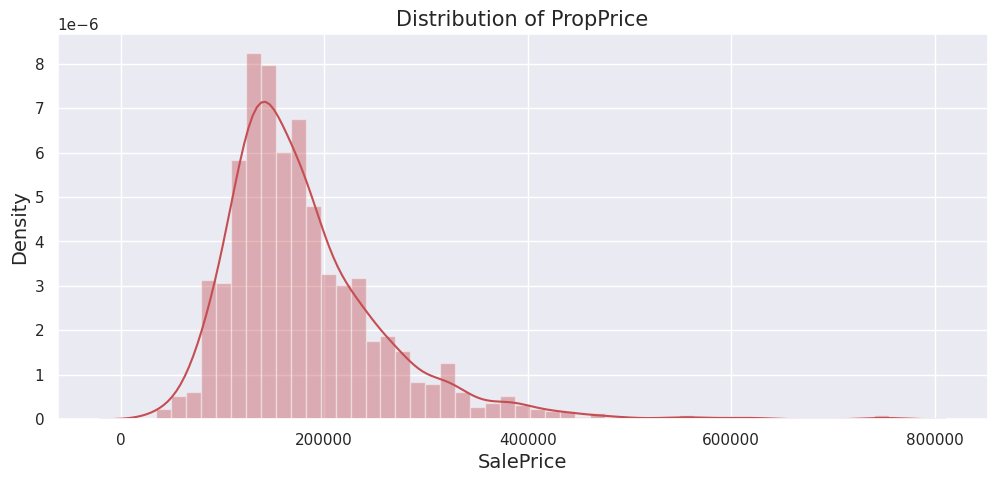

In [741]:
# Distribution of the SalePrice

plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df['SalePrice'], color=('r'))
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of PropPrice", fontsize = 15)
plt.show()

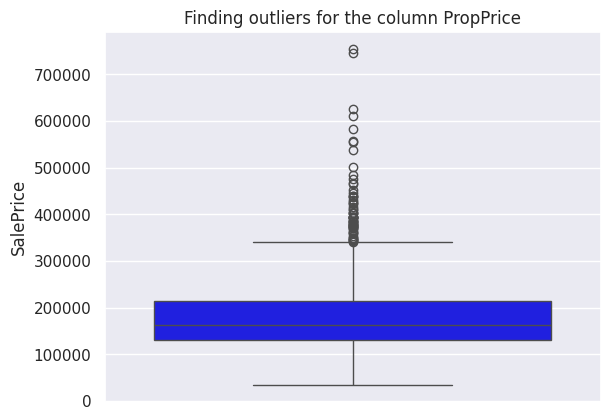

In [742]:
sns.boxplot(y=df["SalePrice"], color='blue')
plt.title('Finding outliers for the column PropPrice')
plt.show()

In [743]:
# Remove outilers
print("Old Shape: ", df.shape)

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print("Q1: ", Q1, "\nQ3: ",Q3, "\nIQR:",IQR)


lower = Q1 - 1.5 * IQR
lower_array = df['SalePrice'] <= lower
print("Lower Bound:", lower)
print(lower_array.sum())

upper = Q3 + 1.5 * IQR
upper_array = df['SalePrice'] >= upper
print("Upper Bound:", upper)
print(upper_array.sum())

df = df[~(lower_array | upper_array)]


print("New Shape: ", df.shape)

Old Shape:  (1460, 232)
Q1:  129975.0 
Q3:  214000.0 
IQR: 84025.0
Lower Bound: 3937.5
0
Upper Bound: 340037.5
61
New Shape:  (1399, 232)


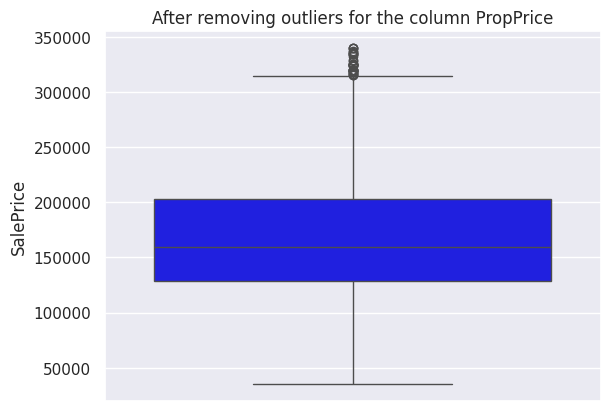

In [744]:
# After Rmoving outilers boxplot
sns.boxplot(y=df["SalePrice"], color='blue')
plt.title('After removing outliers for the column PropPrice')
plt.show()

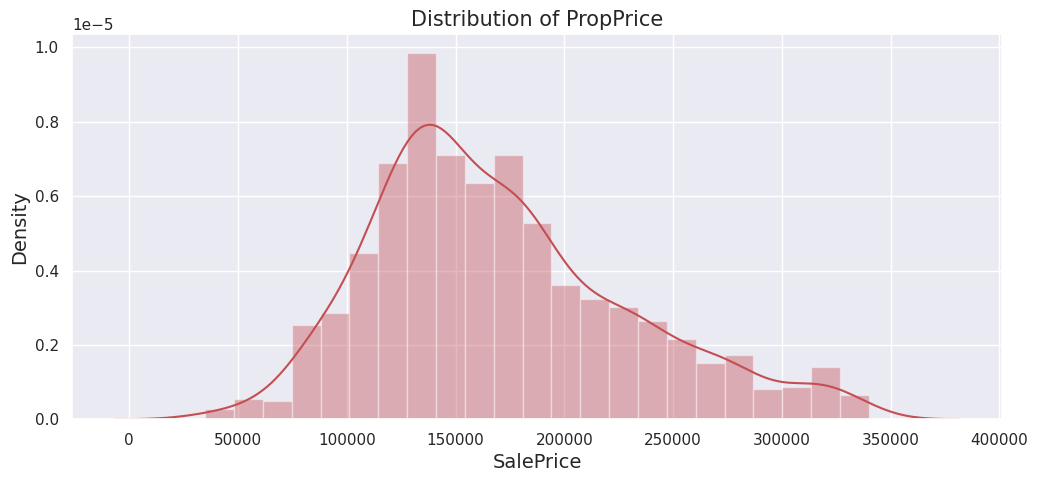

In [745]:
# Distribution of the SalePrice

plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df['SalePrice'], color=('r'))
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of PropPrice", fontsize = 15)
plt.show()

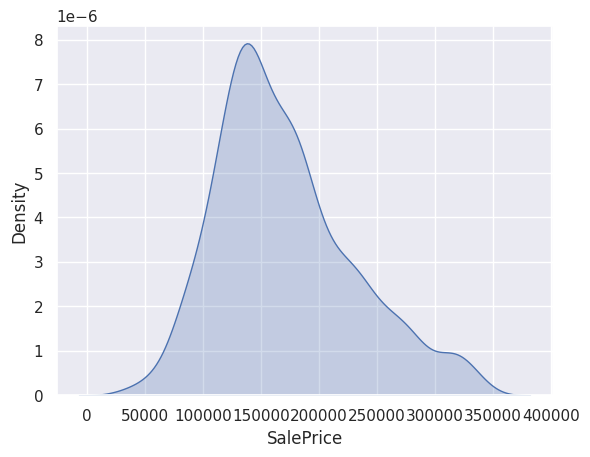

In [746]:
# Create the KDE plot
sns.kdeplot(df['SalePrice'], shade=True)

# Show the plot
plt.show()

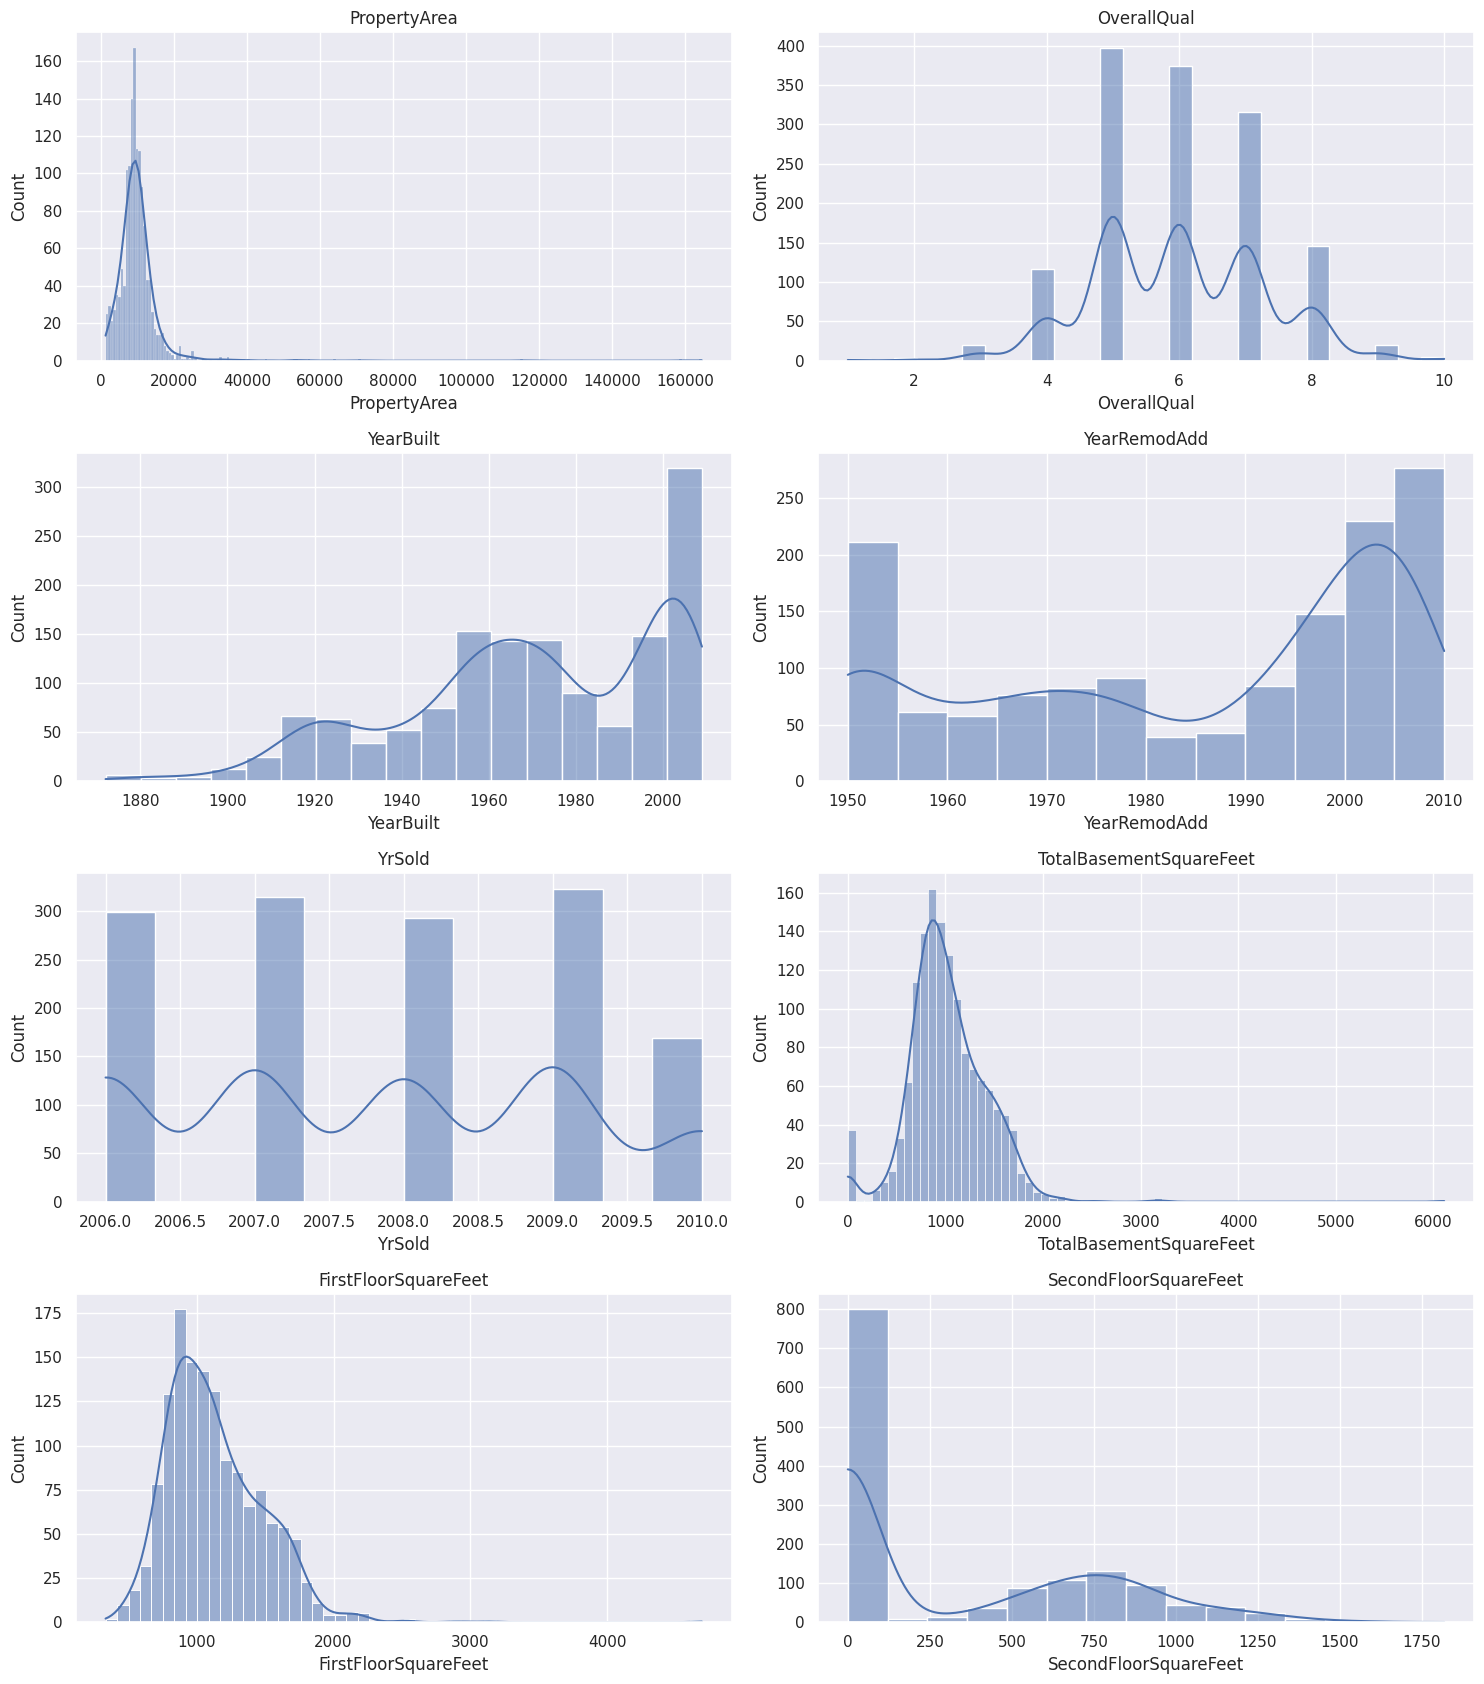

In [747]:
# Create a list of columns to plot
columns_to_plot = ['PropertyArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',  'YrSold', 'TotalBasementSquareFeet' ,'FirstFloorSquareFeet', 'SecondFloorSquareFeet']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

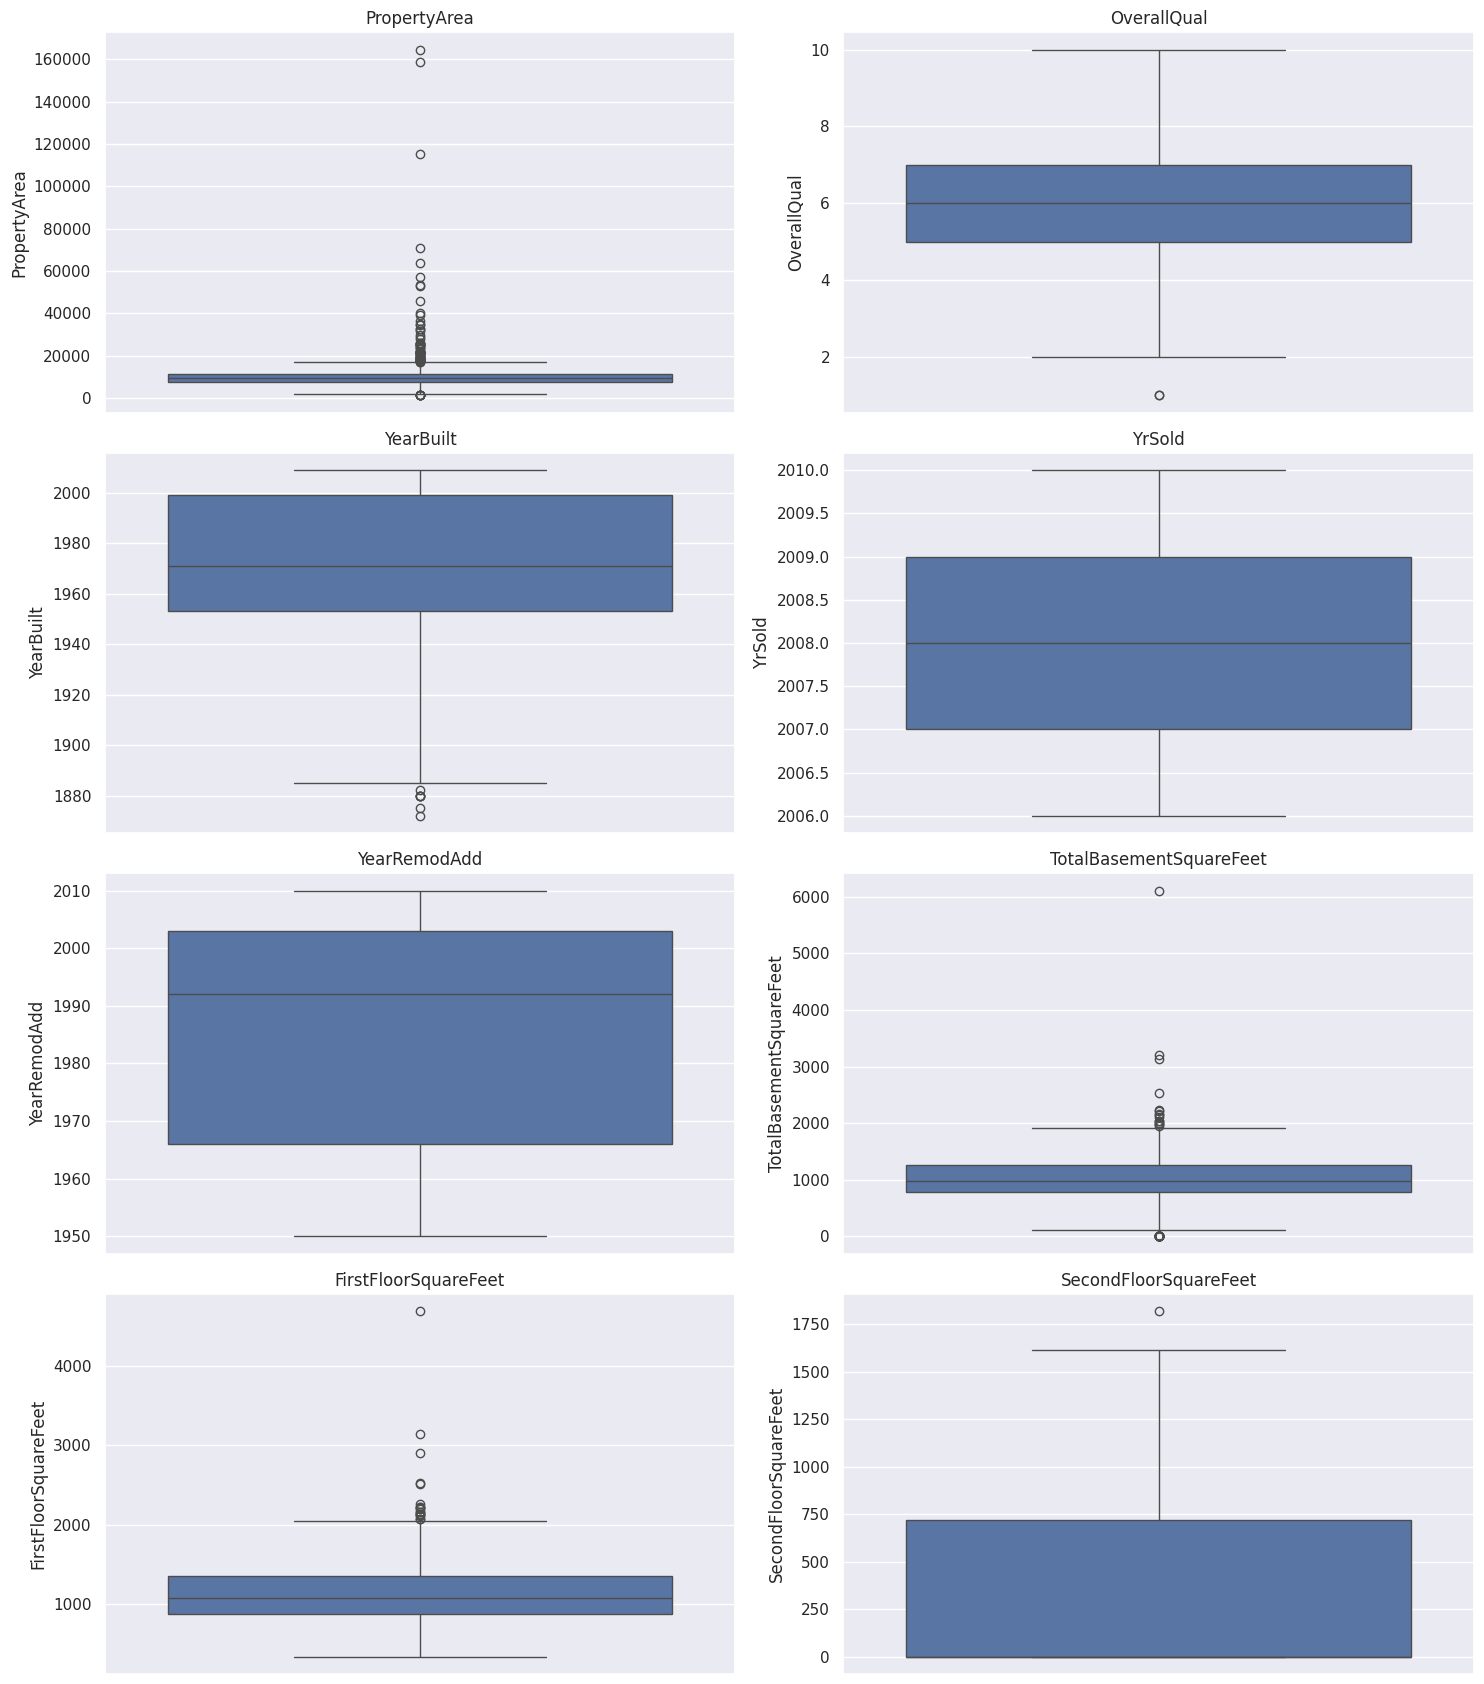

In [748]:
# Create a list of columns to plot
columns_to_plot = [ 'PropertyArea', 'OverallQual', 'YearBuilt', 'YrSold', 'YearRemodAdd', 'TotalBasementSquareFeet' ,'FirstFloorSquareFeet', 'SecondFloorSquareFeet']


# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [749]:
#Use IQR technique to find and rempove outliers

def iqr_technique(DFcol):
    Q1 = np.percentile(DFcol, 25)
    Q3 = np.percentile(DFcol, 75)

    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [750]:
lower_range, upper_range = iqr_technique(df['PropertyArea'])
df = df [(df.PropertyArea > lower_range) & (df.PropertyArea < upper_range) ]

df.shape

(1326, 232)

In [751]:
lower_range, upper_range = iqr_technique(df['OverallQual'])
df = df [(df.OverallQual > lower_range) & (df.OverallQual < upper_range) ]

df.shape

(1318, 232)

In [752]:
lower_range, upper_range = iqr_technique(df['YearBuilt'])
df = df [(df.YearBuilt > lower_range) & (df.YearBuilt < upper_range) ]

df.shape

(1313, 232)

In [753]:
lower_range, upper_range = iqr_technique(df['SecondFloorSquareFeet'])
df = df [(df.SecondFloorSquareFeet > lower_range) & (df.SecondFloorSquareFeet < upper_range) ]

df.shape

(1313, 232)

In [756]:
lower_range, upper_range = iqr_technique(df['TotalBasementSquareFeet'])
df = df [(df.TotalBasementSquareFeet > lower_range) & (df.TotalBasementSquareFeet < upper_range) ]

df.shape

(1266, 232)

In [757]:
lower_range, upper_range = iqr_technique(df['FirstFloorSquareFeet'])
df = df [(df.FirstFloorSquareFeet > lower_range) & (df.FirstFloorSquareFeet < upper_range) ]

df.shape

(1261, 232)

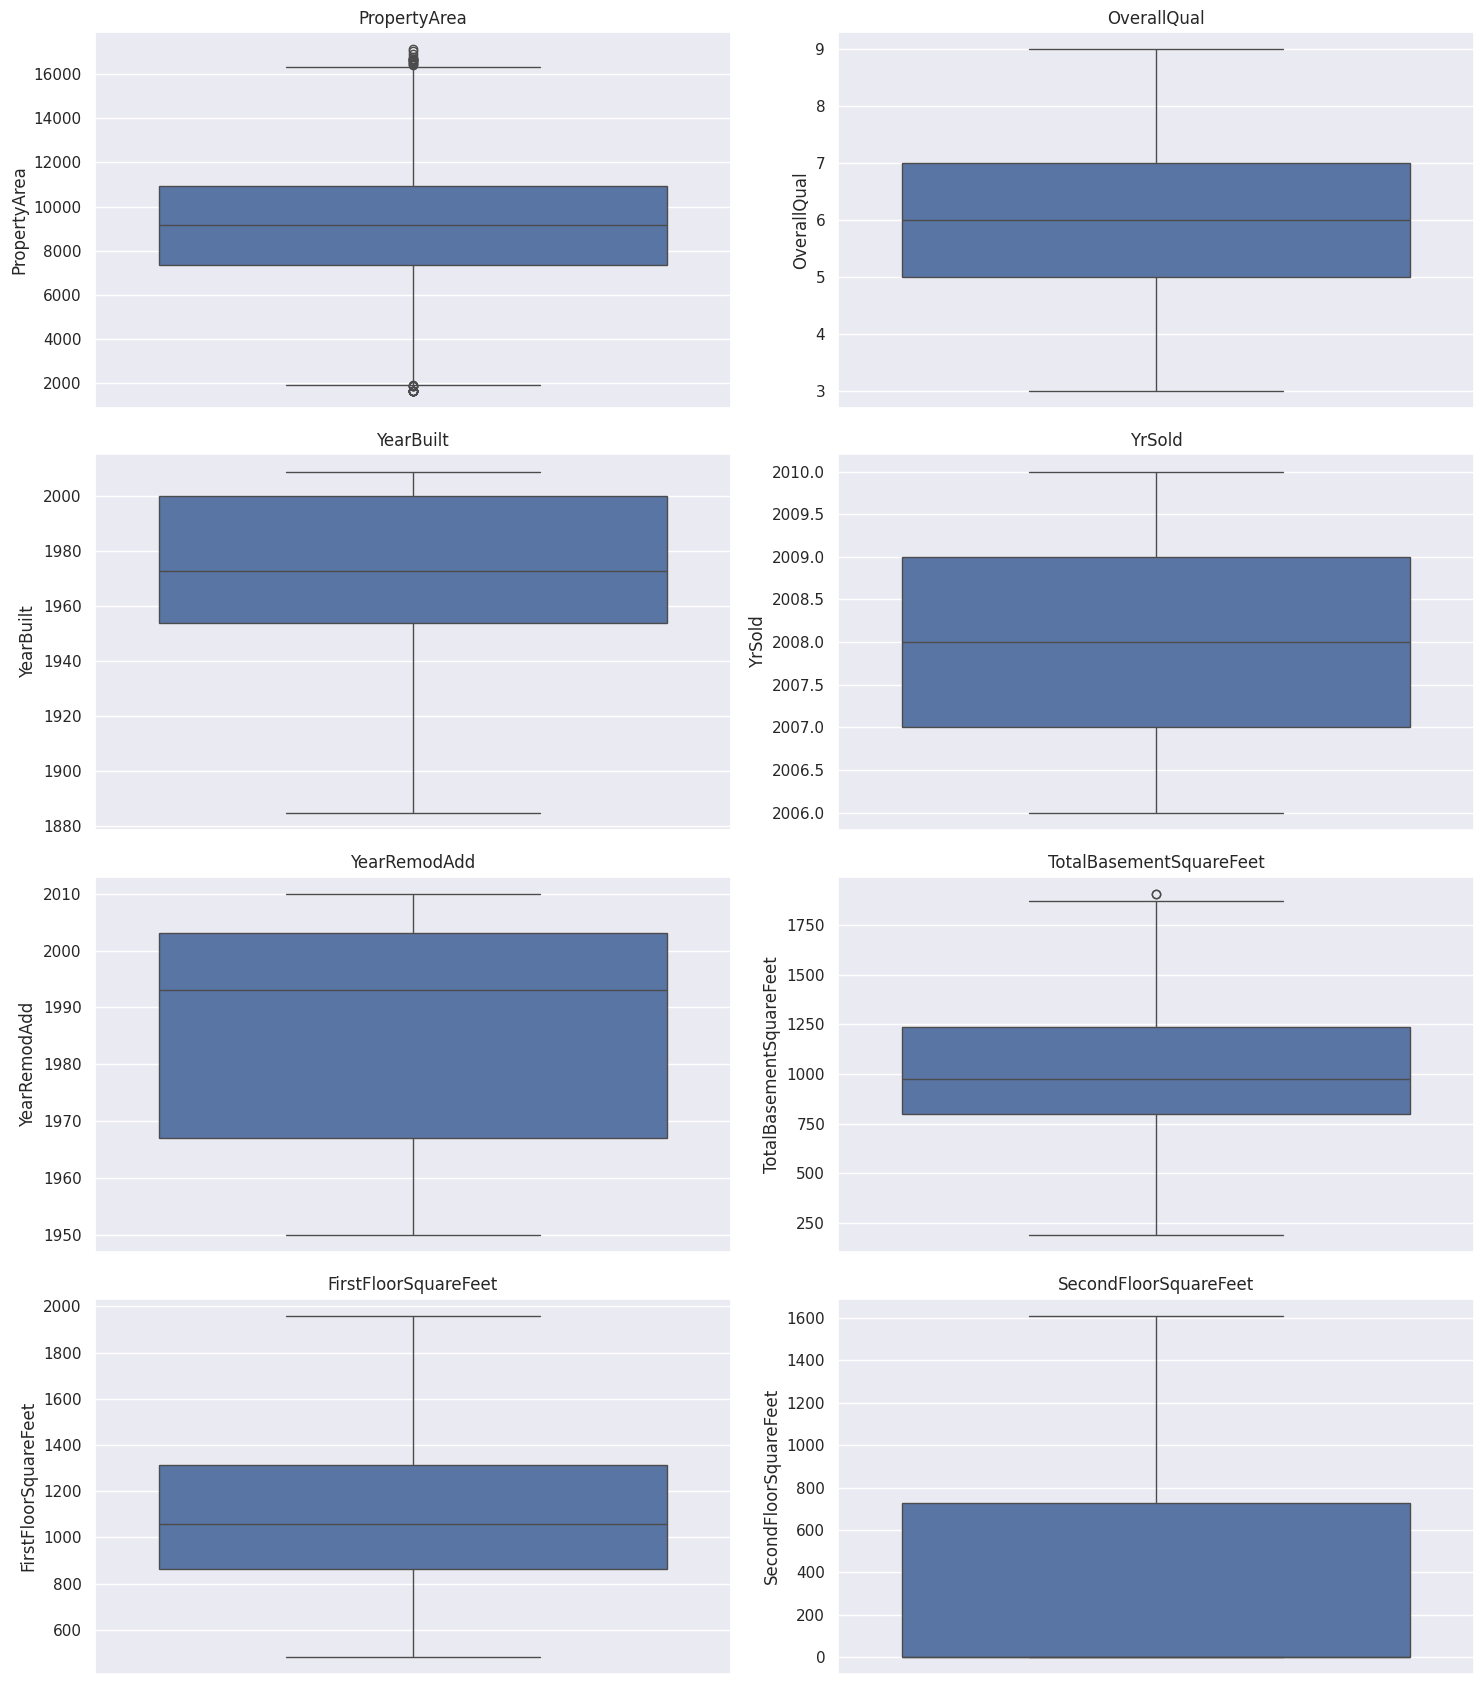

In [758]:
#aFTER REMOVING THE OUTLIERS
columns_to_plot = [ 'PropertyArea', 'OverallQual', 'YearBuilt', 'YrSold', 'YearRemodAdd', 'TotalBasementSquareFeet' ,'FirstFloorSquareFeet', 'SecondFloorSquareFeet']


# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

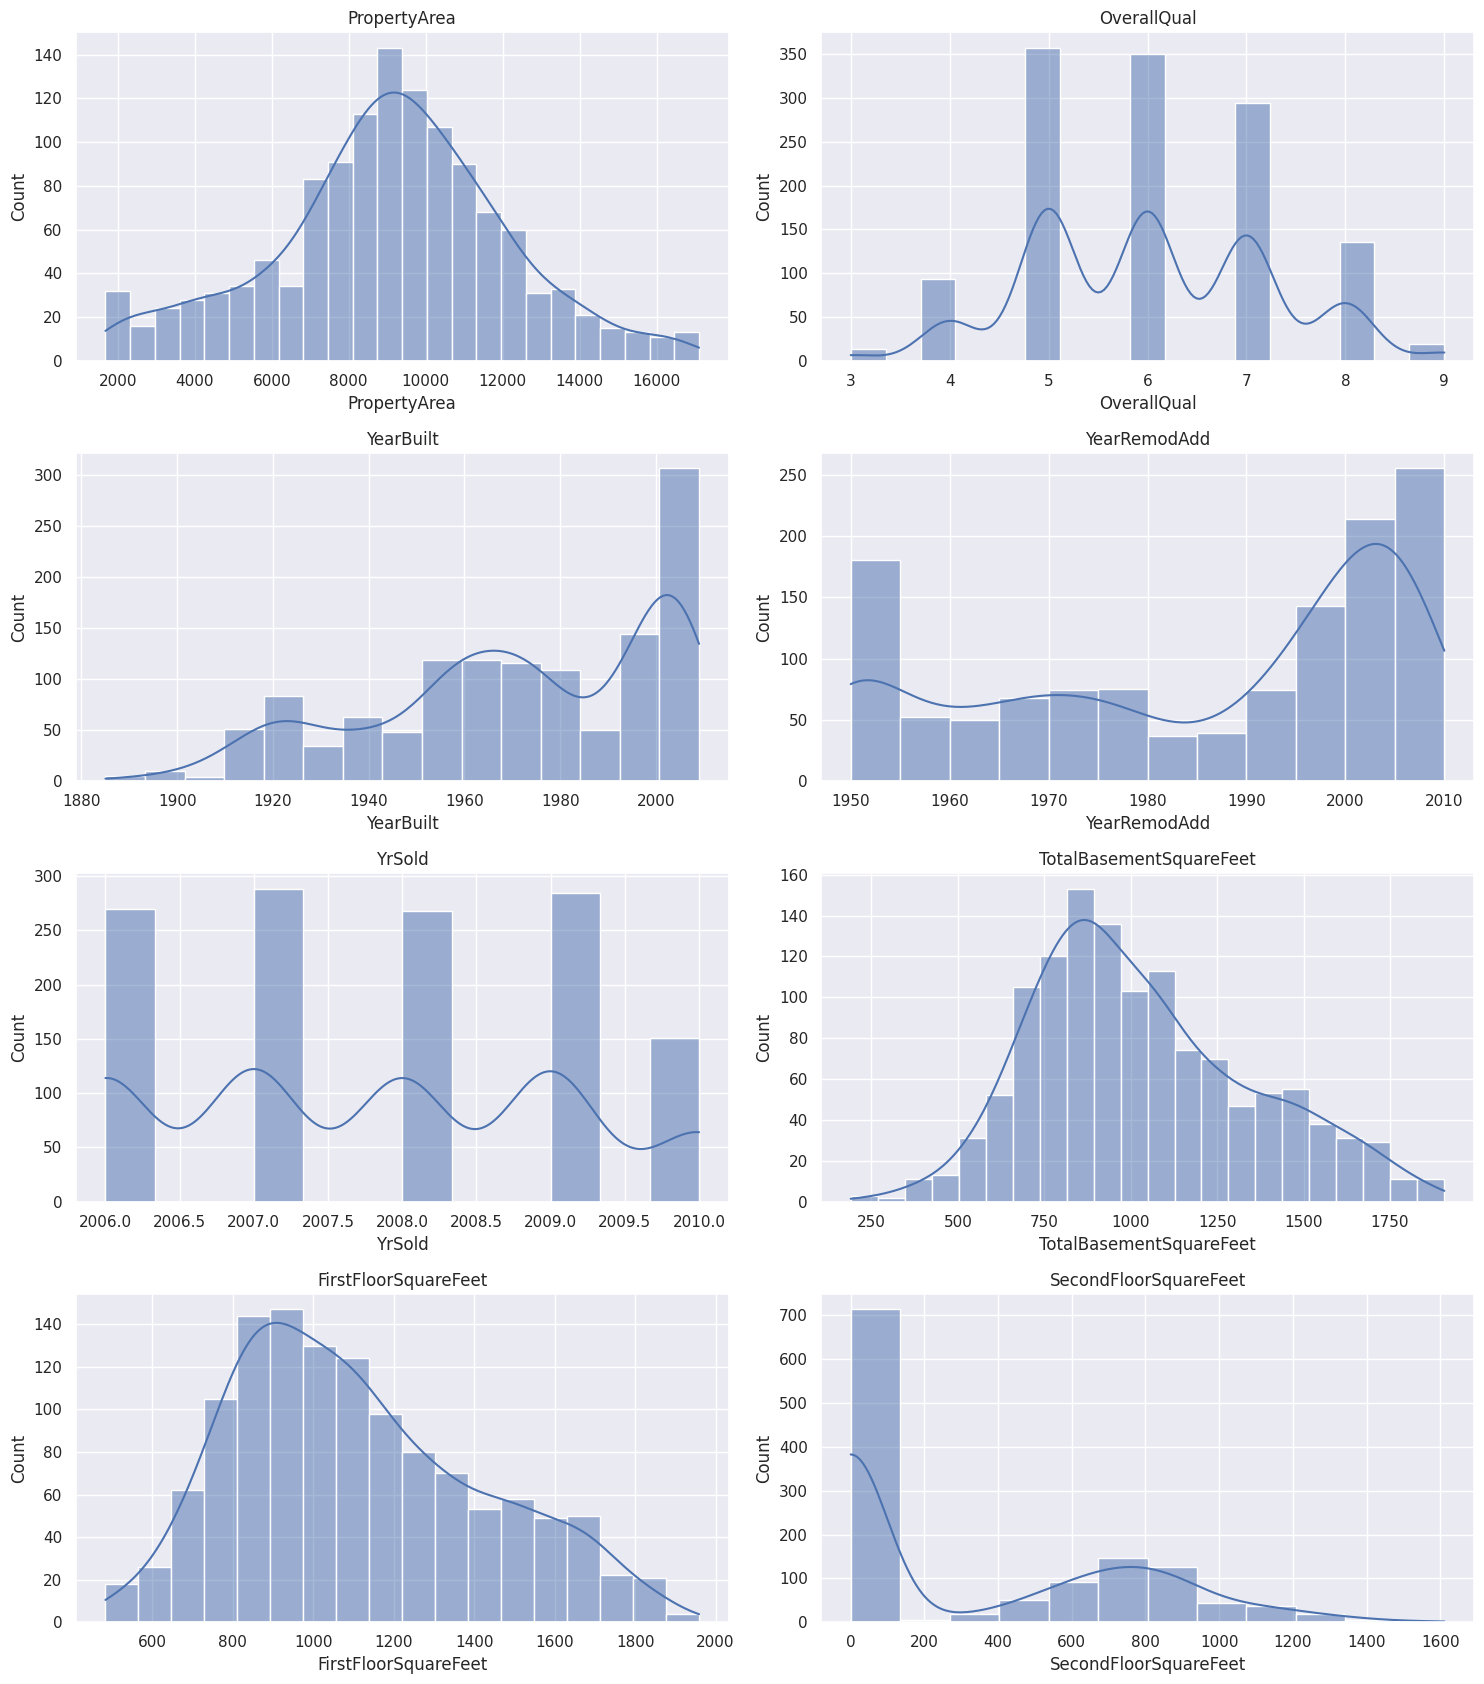

In [759]:
# After removeing outilers
# Create a list of columns to plot
columns_to_plot = ['PropertyArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',  'YrSold', 'TotalBasementSquareFeet' ,'FirstFloorSquareFeet', 'SecondFloorSquareFeet']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [762]:
# Creating new features
df['Age'] = df['YrSold'] - df['YearBuilt']
df['TotalSquareFeet'] = df['FirstFloorSquareFeet'] + df['SecondFloorSquareFeet'] + df['TotalBasementSquareFeet']
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

In [763]:
df.columns

Index(['PropertyFrontage', 'PropertyArea', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasonryVeneerArea',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Age', 'TotalSquareFeet',
       'YearsSinceRemodel'],
      dtype='object', length=235)

In [764]:
df.shape

(1261, 235)

In [765]:
df.iloc[:, 180:190].head()

Functional_Mod  Functional_Sev  Functional_Typ  GarageType_2Types  \
0               0               0               1                  0   
1               0               0               1                  0   
2               0               0               1                  0   
3               0               0               1                  0   
4               0               0               1                  0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_No  
0                   0                  0              0  
1                   0                  0              0  
2                   0                  0              0  
3                   0                  1              0  
4                   0                  0              0

In [768]:
# Select relevant columns for multivariate analysis
selected_columns = [ 'PropertyArea', 'OverallQual', 'YearBuilt',
                     'YearRemodAdd', 'FirstFloorSquareFeet', 'SecondFloorSquareFeet', 'Age', 'TotalSquareFeet', 'YearsSinceRemodel','SalePrice']
df_selected = df[selected_columns]

In [769]:
df_selected.describe()

PropertyArea  OverallQual    YearBuilt  YearRemodAdd  \
count   1261.000000  1261.000000  1261.000000   1261.000000   
mean    9073.437748     6.030928  1971.234734   1984.770817   
std     3066.066137     1.211648    29.850720     20.479970   
min     1680.000000     3.000000  1885.000000   1950.000000   
25%     7340.000000     5.000000  1954.000000   1967.000000   
50%     9144.000000     6.000000  1973.000000   1993.000000   
75%    10944.000000     7.000000  2000.000000   2003.000000   
max    17104.000000     9.000000  2009.000000   2010.000000   

       FirstFloorSquareFeet  SecondFloorSquareFeet          Age  \
count           1261.000000            1261.000000  1261.000000   
mean            1107.406027             338.484536    36.573354   
std              309.897254             416.351693    29.890521   
min              483.000000               0.000000     0.000000   
25%              864.000000               0.000000     8.000000   
50%             1056.000000               0.000000    35.000000   
75%             1314.000000             728.000000    54.000000   
max             1959.000000            1611.000000   125.000000   

       TotalSquareFeet  YearsSinceRemodel      SalePrice  
count      1261.000000        1261.000000    1261.000000  
mean       2477.236320          23.037272  169990.556701  
std         609.489575          20.468273   56860.141185  
min         999.000000           0.000000   34900.000000  
25%        2014.000000           5.000000  130000.000000  
50%        2432.000000          15.000000  159500.000000  
75%        2886.000000          41.000000  200500.000000  
max        4895.000000          60.000000  340000.000000

In [770]:
df_selected

PropertyArea  OverallQual  YearBuilt  YearRemodAdd  \
0             8450            7       2003          2003   
1             9600            6       1976          1976   
2            11250            7       2001          2002   
3             9550            7       1915          1970   
4            14260            8       2000          2000   
...            ...          ...        ...           ...   
1454          7500            7       2004          2005   
1455          7917            6       1999          2000   
1457          9042            7       1941          2006   
1458          9717            5       1950          1996   
1459          9937            5       1965          1965   

      FirstFloorSquareFeet  SecondFloorSquareFeet  Age  TotalSquareFeet  \
0                      856                    854    5             2566   
1                     1262                      0   31             2524   
2                      920                    866    7             2706   
3                      961                    756   91             2473   
4                     1145                   1053    8             3343   
...                    ...                    ...  ...              ...   
1454                  1221                      0    5             2442   
1455                   953                    694    8             2600   
1457                  1188                   1152   69             3492   
1458                  1078                      0   60             2156   
1459                  1256                      0   43             2512   

      YearsSinceRemodel  SalePrice  
0                     5     208500  
1                    31     181500  
2                     6     223500  
3                    36     140000  
4                     8     250000  
...                 ...        ...  
1454                  4     185000  
1455                  7     175000  
1457                  4     266500  
1458                 14     142125  
1459                 43     147500  

[1261 rows x 10 columns]

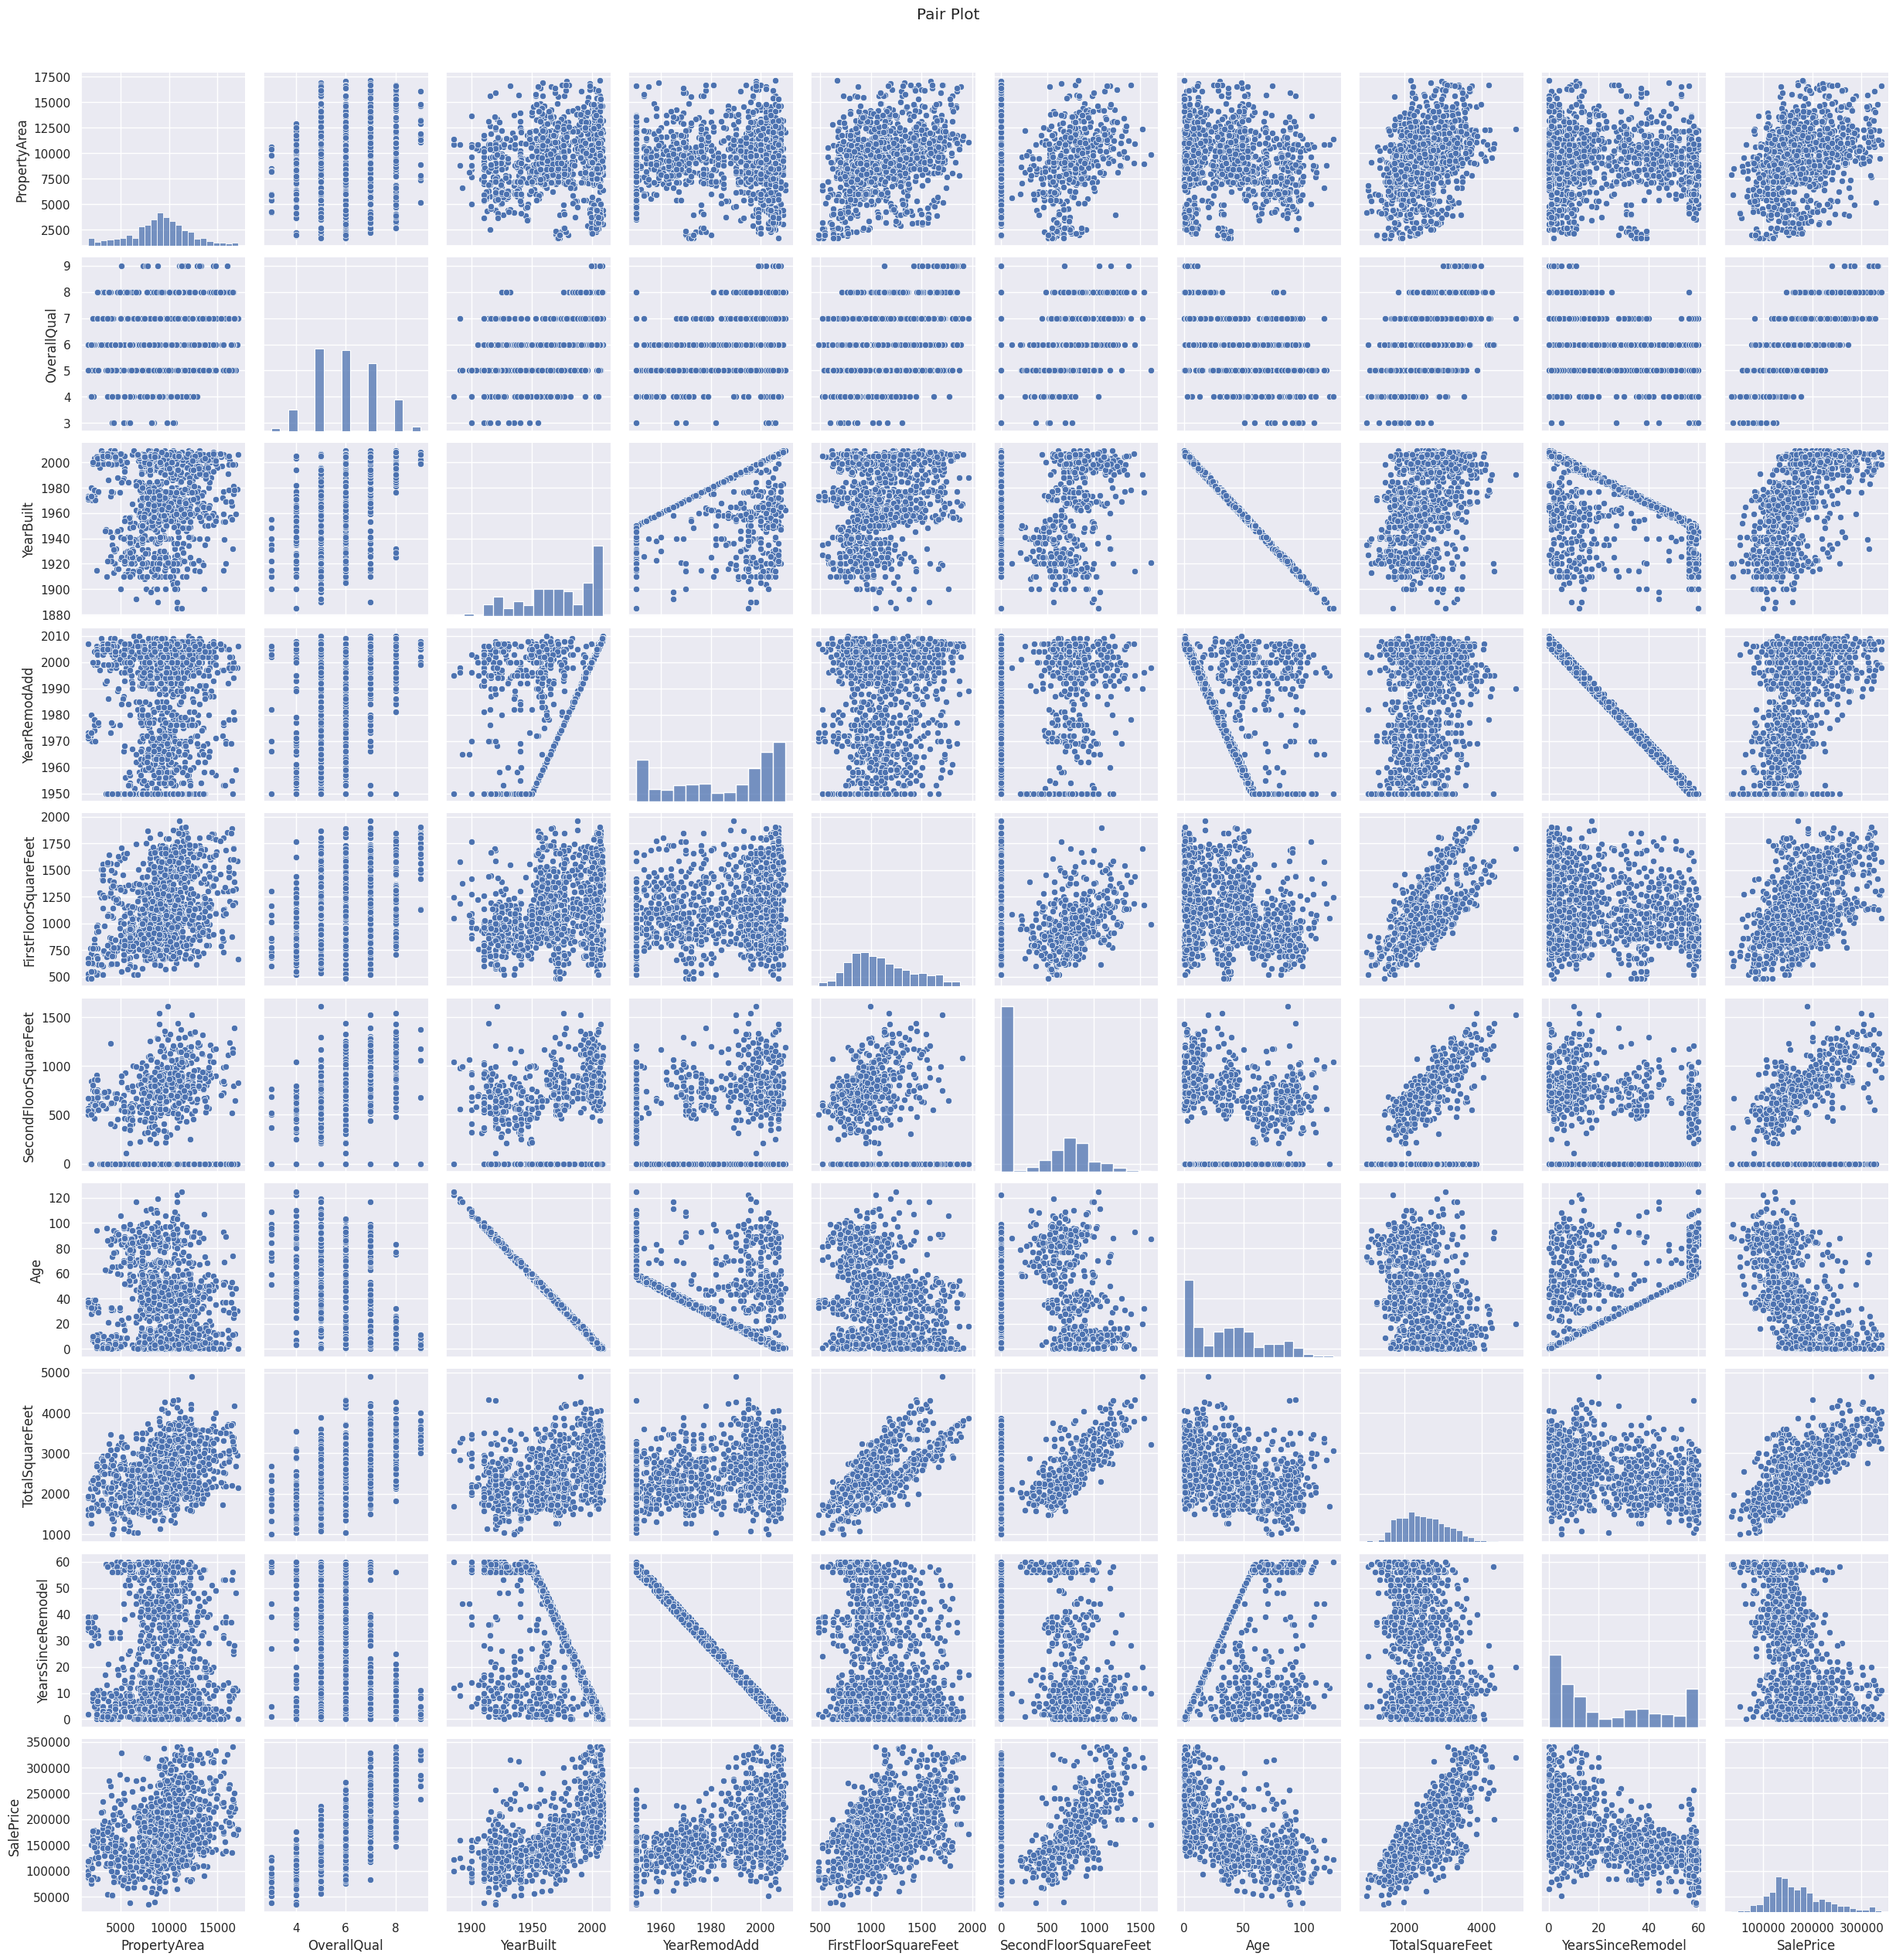

In [771]:
# Pair plot
sns.pairplot(df_selected)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

<Axes: xlabel='SalePrice', ylabel='TotalSquareFeet'>

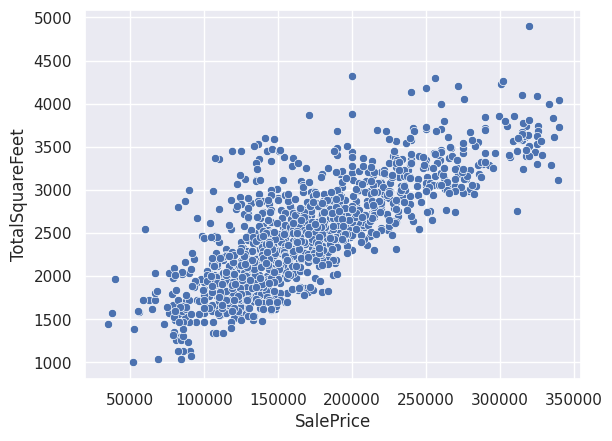

In [772]:
sns.scatterplot(data=df, x="SalePrice",y="TotalSquareFeet")

<Axes: xlabel='SalePrice', ylabel='YearBuilt'>

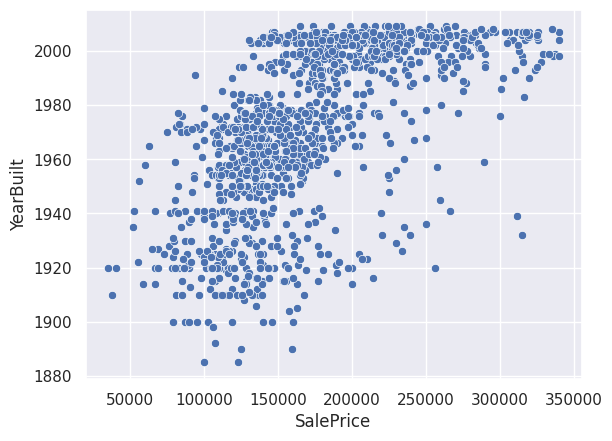

In [773]:
sns.scatterplot(data=df, x="SalePrice",y="YearBuilt")

<Axes: xlabel='SalePrice', ylabel='Age'>

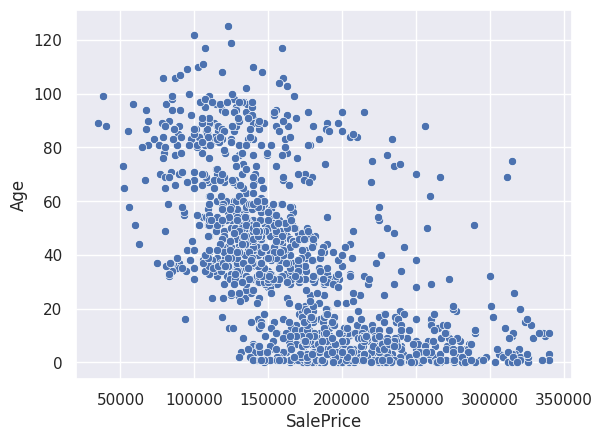

In [775]:
sns.scatterplot(data=df, x="SalePrice",y="Age")

Conclusion of the Analysis



The pair plot visualizes the relationships between pairs of variables, Key

*   OverallQual and PropPrice: High correlation, indicating quality significantly affects property price.
*   TotalSquareFeet and PropPrice: Strong positive correlation, larger properties tend to be more expensive

*   FirstFloorSquareFeet and TotalSquareFeet: High correlation, indicating first floor size is a significant component of total size.
*   YearBuilt and Age: Strong negative correlation, as expected (older properties have higher 'Age')

*   OverallQual and TotalSquareFeet likely have significant positive coefficients, reinforcing their importance in determining property prices.
*   YearBuilt and YearsSinceRemodel might have varying impacts, potentially showing significant influence or multicollinearity issues.

*   Property quality and total size are the strongest predictors of price.

